In [1]:
%run func_def.ipynb

**imports loaded.

> Pre-Processing func:
    get_striking_efficiency(name, date)
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_c

### <span style='color:green'> **[done]** </span>Loading stat_model trained data:

In [2]:
loc = '../data/'
file = 'data_stats_prediction_set.csv'
df = pd.read_csv(loc+file)
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6391,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.348387,0.397494,1.187861,-0.002558,1.633834,0.873610,0.2,0.448041,0.479892,-0.841440,0.867687,0.00651,0.146327,1.413746,1.115983,-0.006381,False,False,-1.272519,-1.272519,-1.272519,-1.272519
6392,lose,Jinh Yu Frey,Elise Reed,2023-06-03,Women's Strawweight,U-DEC,Unanimous,-0.002526,-0.927126,1.187861,-0.002558,0.204147,1.357267,0.3,-0.003540,-0.677039,0.609593,-0.089643,-0.00758,1.140573,-0.244404,0.002351,-0.006381,False,False,0.029091,0.029091,0.029091,0.029091
6393,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,-0.002526,-1.405462,0.008973,0.858352,0.058375,0.735422,-0.2,0.592296,0.066702,2.041700,-0.350734,0.00000,-0.790410,0.003081,0.002351,-0.006381,False,False,-0.718052,-0.718052,-0.718052,-0.718052


#### <span style='color:green'> **[done]** </span>Filter by weight_class:

In [3]:
weight = "General"
weight_classes = {'General','Flyweight','Bantamweight','Featherweight',
                  'Lightweight','Welterweight','Middleweight',
                  'Light Heavyweight','Heavyweight','Super Heavyweight','Open Weight',
                  "Women's Strawweight","Women's Flyweight","Women's Bantamweight",
                  "Women's Featherweight"}

if weight != 'General':
    df = df[df['weight_class']==weight].reset_index(drop=True)
    
df.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
6391,lose,Jamie Mullarkey,Muhammad Naimov,2023-06-03,Lightweight,KO/TKO,Punch,-1.348387,0.397494,1.187861,-0.002558,1.633834,0.873610,0.2,0.448041,0.479892,-0.841440,0.867687,0.00651,0.146327,1.413746,1.115983,-0.006381,False,False,-1.272519,-1.272519,-1.272519,-1.272519
6392,lose,Jinh Yu Frey,Elise Reed,2023-06-03,Women's Strawweight,U-DEC,Unanimous,-0.002526,-0.927126,1.187861,-0.002558,0.204147,1.357267,0.3,-0.003540,-0.677039,0.609593,-0.089643,-0.00758,1.140573,-0.244404,0.002351,-0.006381,False,False,0.029091,0.029091,0.029091,0.029091
6393,lose,Luan Lacerda,Da'Mon Blackshear,2023-06-03,Bantamweight,KO/TKO,Punches,-0.002526,-1.405462,0.008973,0.858352,0.058375,0.735422,-0.2,0.592296,0.066702,2.041700,-0.350734,0.00000,-0.790410,0.003081,0.002351,-0.006381,False,False,-0.718052,-0.718052,-0.718052,-0.718052


#### <span style='color:green'> **[done]** </span>Define X & Y:

In [4]:
req_data = ['date','weight_class','fighter','opponent','method','outlier','lof_outlier']
y = ['result']
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td_avg_dif','td_def_dif','sub_avg_dif',
    'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif'
    ]

df = df[req_data + X + y]
df.tail(3)

,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
6391,2023-06-03,Lightweight,Jamie Mullarkey,Muhammad Naimov,KO/TKO,False,False,-1.348387,0.397494,1.187861,-0.002558,1.633834,0.873610,0.2,0.448041,0.479892,-0.841440,0.867687,0.146327,1.413746,1.115983,-0.006381,lose
6392,2023-06-03,Women's Strawweight,Jinh Yu Frey,Elise Reed,U-DEC,False,False,-0.002526,-0.927126,1.187861,-0.002558,0.204147,1.357267,0.3,-0.003540,-0.677039,0.609593,-0.089643,1.140573,-0.244404,0.002351,-0.006381,lose
6393,2023-06-03,Bantamweight,Luan Lacerda,Da'Mon Blackshear,KO/TKO,False,False,-0.002526,-1.405462,0.008973,0.858352,0.058375,0.735422,-0.2,0.592296,0.066702,2.041700,-0.350734,-0.790410,0.003081,0.002351,-0.006381,lose


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [5]:
df = df[(df.outlier == False)&(df.lof_outlier == False)].reset_index(drop=True)
df.tail(3)

,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
5203,2023-06-03,Lightweight,Jamie Mullarkey,Muhammad Naimov,KO/TKO,False,False,-1.348387,0.397494,1.187861,-0.002558,1.633834,0.873610,0.2,0.448041,0.479892,-0.841440,0.867687,0.146327,1.413746,1.115983,-0.006381,lose
5204,2023-06-03,Women's Strawweight,Jinh Yu Frey,Elise Reed,U-DEC,False,False,-0.002526,-0.927126,1.187861,-0.002558,0.204147,1.357267,0.3,-0.003540,-0.677039,0.609593,-0.089643,1.140573,-0.244404,0.002351,-0.006381,lose
5205,2023-06-03,Bantamweight,Luan Lacerda,Da'Mon Blackshear,KO/TKO,False,False,-0.002526,-1.405462,0.008973,0.858352,0.058375,0.735422,-0.2,0.592296,0.066702,2.041700,-0.350734,-0.790410,0.003081,0.002351,-0.006381,lose


#### <span style='color:green'> **[done]** </span>Data status:

In [6]:
df = set_train_test(X_columns=X, y_columns=y, data=df, test_size=0.15, valid_size=0.05)
df.tail(3)

Data split: Data=(5206, 24), train_set=(4215, 15), validation_set=(205, 15), test_set=(786, 15)


,set,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result
5203,train,2023-06-03,Lightweight,Jamie Mullarkey,Muhammad Naimov,KO/TKO,False,False,-1.348387,0.397494,1.187861,-0.002558,1.633834,0.873610,0.2,0.448041,0.479892,-0.841440,0.867687,0.146327,1.413746,1.115983,-0.006381,lose
5204,train,2023-06-03,Women's Strawweight,Jinh Yu Frey,Elise Reed,U-DEC,False,False,-0.002526,-0.927126,1.187861,-0.002558,0.204147,1.357267,0.3,-0.003540,-0.677039,0.609593,-0.089643,1.140573,-0.244404,0.002351,-0.006381,lose
5205,test,2023-06-03,Bantamweight,Luan Lacerda,Da'Mon Blackshear,KO/TKO,False,False,-0.002526,-1.405462,0.008973,0.858352,0.058375,0.735422,-0.2,0.592296,0.066702,2.041700,-0.350734,-0.790410,0.003081,0.002351,-0.006381,lose


In [7]:
print('Train records: %d' %len(df[df.set=='train']))
print('Train records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'train')])))
print('Train records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'train')])))
print('-----------------------------------')
print('Validation records: %d' %len(df[df.set=='validation']))
print('Validation records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'validation')])))
print('Validation records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'validation')])))
print('-----------------------------------')
print('Test records: %d' %len(df[df.set=='test']))
print('Test records of df.result==%s : %d' %(df.result.unique()[0],len(df[(df.result == df.result.unique()[0])&(df.set == 'test')])))
print('Test records of df.result==%s : %d' %(df.result.unique()[1],len(df[(df.result == df.result.unique()[1])&(df.set == 'test')])))

Train records: 4215
Train records of df.result==lose : 2113
Train records of df.result==win : 2102
-----------------------------------
Validation records: 205
Validation records of df.result==lose : 91
Validation records of df.result==win : 114
-----------------------------------
Test records: 786
Test records of df.result==lose : 388
Test records of df.result==win : 398


## <span style='color:green'> **[done]** </span> Logistic regression model training:

In [8]:
X = ['kd_dif','str_dif','td_dif','sub_dif',
    'td_avg_dif','td_def_dif','sub_avg_dif',
    'slpm_dif','str_acc_dif','sapm_dif','str_def_dif',
    'stance_win_ratio','win_perc_dif','win_strk_dif','lose_strk_dif']

logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=1, solver='lbfgs')
df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)
df.tail(3)

,set,date,weight_class,fighter,opponent,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,result,result_pred
5203,train,2023-06-03,Lightweight,Jamie Mullarkey,Muhammad Naimov,KO/TKO,False,False,-1.348387,0.397494,1.187861,-0.002558,1.633834,0.873610,0.2,0.448041,0.479892,-0.841440,0.867687,0.146327,1.413746,1.115983,-0.006381,lose,win
5204,train,2023-06-03,Women's Strawweight,Jinh Yu Frey,Elise Reed,U-DEC,False,False,-0.002526,-0.927126,1.187861,-0.002558,0.204147,1.357267,0.3,-0.003540,-0.677039,0.609593,-0.089643,1.140573,-0.244404,0.002351,-0.006381,lose,lose
5205,test,2023-06-03,Bantamweight,Luan Lacerda,Da'Mon Blackshear,KO/TKO,False,False,-0.002526,-1.405462,0.008973,0.858352,0.058375,0.735422,-0.2,0.592296,0.066702,2.041700,-0.350734,-0.790410,0.003081,0.002351,-0.006381,lose,lose


Initial model accuracy: 0.8461


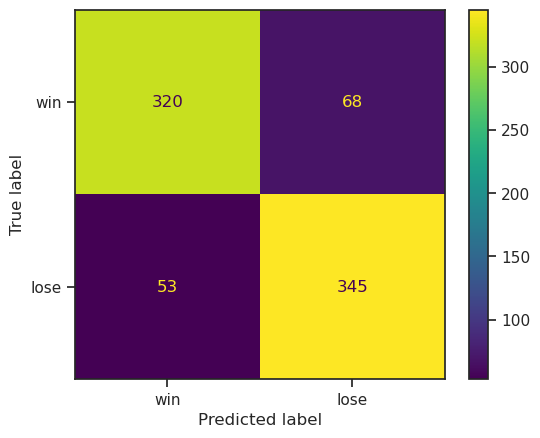

In [9]:
set_label = 'test'
cm =  confusion_matrix(y_true=df.result[df.set==set_label], y_pred=df.result_pred[df.set==set_label])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['win','lose'])
print('Initial model accuracy: %.4f' %get_accuracy(act=df.result[df.set==set_label], pred=df.result_pred[df.set==set_label]))
disp.plot()

### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [10]:
train_index = df.index[df.set=='train']
valid_index = df.index[df.set=='validation']
test_index = df.index[df.set=='test']

grid = {'C':[],
       'train_accuracy':[],
       'valid_accuracy':[],
       'test_accuracy':[]
       }

for c in tqdm([0.01,0.025,0.05,0.075,0.1,0.25,0.5,0.75,1]):
    grid['C'].append(c)
    logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=c, solver='lbfgs')
    df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)
    grid['train_accuracy'].append(get_mean_accuracy(act=df.loc[train_index,'result'], pred=df.loc[train_index,'result_pred']))
    grid['valid_accuracy'].append(get_mean_accuracy(act=df.loc[valid_index,'result'], pred=df.loc[valid_index,'result_pred']))
    grid['test_accuracy'].append(get_mean_accuracy(act=df.loc[test_index,'result'], pred=df.loc[test_index,'result_pred']))
    
grid = grid = pd.DataFrame(data=grid)
grid

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 39.16it/s]


,C,train_accuracy,valid_accuracy,test_accuracy
0,0.010,0.867378,0.858537,0.847328
1,0.025,0.868327,0.868293,0.847328
2,0.050,0.870937,0.868293,0.847328
3,0.075,0.870463,0.868293,0.848601
4,0.100,0.870225,0.863415,0.848601
5,0.250,0.871649,0.863415,0.846056
6,0.500,0.872123,0.863415,0.846056
7,0.750,0.872123,0.863415,0.846056
8,1.000,0.872123,0.863415,0.846056


Text(0, 0.5, 'Accuracy')

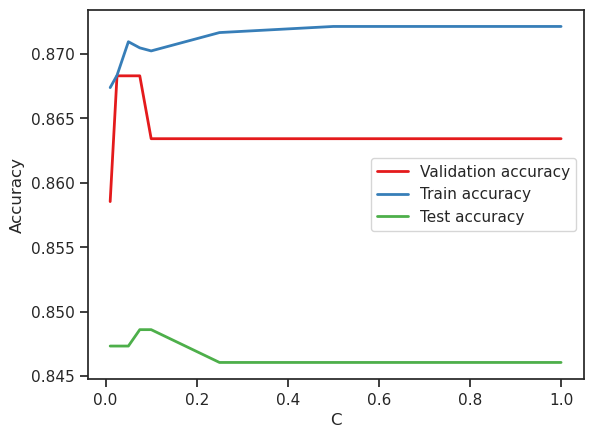

In [11]:
sns.lineplot( data=grid, x='C', y='valid_accuracy', label='Validation accuracy')
#sns.scatterplot( data=grid, x='C', y='valid_accuracy')
sns.lineplot( data=grid, x='C', y='train_accuracy', label='Train accuracy')
#sns.scatterplot( data=grid, x='C', y='train_accuracy')
sns.lineplot( data=grid, x='C', y='test_accuracy', label='Test accuracy')
#sns.scatterplot( data=grid, x='C', y='test_accuracy')
plt.ylabel("Accuracy")

In [12]:
best_model_param = grid.sort_values(by=['valid_accuracy'], ascending=False).reset_index(drop=True)
best_c = best_model_param.iloc[0]['C']
best_model_param.iloc[0]

C                 0.025000
train_accuracy    0.868327
valid_accuracy    0.868293
test_accuracy     0.847328
Name: 0, dtype: float64

Post Parameters Tuning accuracy: 0.8473


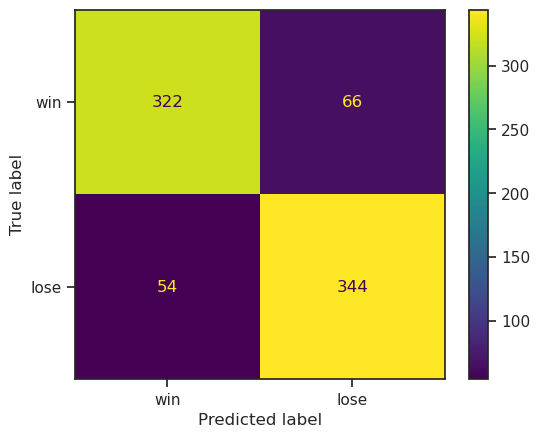

In [13]:
logistic_reg_clf = set_logistic_reg_clf(X_columns=X, y_columns=y, data=df, penalty='l2', c=best_c, solver='lbfgs')
df = set_predictions(data=df,model=logistic_reg_clf, X_columns=X, y_columns=y)

set_label = 'test'
cm =  confusion_matrix(y_true=df.result[df.set==set_label], y_pred=df.result_pred[df.set==set_label])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['win','lose'])
print('Post Parameters Tuning accuracy: %.4f' %get_accuracy(act=df.result[df.set==set_label], pred=df.result_pred[df.set==set_label]))
disp.plot()

#### <span style='color:green'> **[done]** </span> Add predictions to data:

In [14]:
pred_columns = ['result_pred']
pred = df[['date','fighter','opponent'] + pred_columns]
pred.tail(3)

,date,fighter,opponent,result_pred
5203,2023-06-03,Jamie Mullarkey,Muhammad Naimov,win
5204,2023-06-03,Jinh Yu Frey,Elise Reed,lose
5205,2023-06-03,Luan Lacerda,Da'Mon Blackshear,lose


In [15]:
data = pd.read_csv('../data/data_features_outliers_detected.csv')
data = pd.merge(data,pred, on=['date','fighter','opponent'], how='outer')

data.to_csv('../data/data_result_prediction_set.csv', index=None)
print('../data/data_result_prediction_set.csv saved.')
print('result_pred: %s' %data.result_pred.unique())
data.head(3)

../data/data_result_prediction_set.csv saved.
result_pred: [nan 'lose' 'win']


,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,str_efc_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier,result_pred
0,lose,Arnold Allen,Max Holloway,2023-04-15,Featherweight,U-DEC,Unanimous,-0.002526,-2.619697,0.008973,-0.002558,0.473264,-0.266439,0.0,-2.399427,-0.594401,-1.219970,0.171447,0.00454,1.140573,0.671291,5.570510,-1.026378,True,True,NaN
1,lose,Billy Quarantillo,Edson Barboza,2023-04-15,Featherweight,KO/TKO,Knee,-1.348387,-0.080841,0.008973,-0.002558,0.635856,-0.577362,1.1,2.417434,1.140995,1.051212,-1.569154,-0.00814,0.146327,0.300063,0.559167,-2.046375,False,False,lose
2,win,Azamat Murzakanov,Dustin Jacoby,2023-04-15,Light Heavyweight,U-DEC,Unanimous,1.343336,0.103134,0.008973,-0.002558,0.198540,0.804516,0.0,-0.549200,0.810444,-0.576469,-0.089643,0.00399,1.140573,0.498051,0.559167,-1.026378,False,False,win


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [16]:
save_trained_model(model=logistic_reg_clf,filename_path='../global_variables/result_pred_' + set_lower_cases(weight) + '_logistic_reg.pkl')

../global_variables/result_pred_general_logistic_reg.pkl saved.


#### <span style='color:green'> **[done]** </span> saving data:

In [17]:
try:
    df.to_csv('../data/data_result_prediction_set.csv',index=None)
    print('../data/data_result_prediction_set.csv saved.')
except:
    print('error occurs saving ../data/data_result_prediction_set.csv - might be file in use.')

../data/data_result_prediction_set.csv saved.
